In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
missing_count = df['total_bedrooms'].isnull().sum()
non_missing_count = df['total_bedrooms'].notnull().sum()

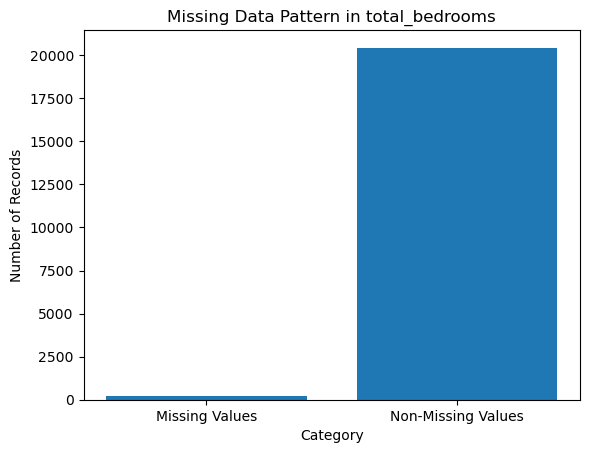

In [7]:
import matplotlib.pyplot as plt

counts = [missing_count, non_missing_count]
labels = ['Missing Values', 'Non-Missing Values']

plt.bar(labels, counts)
plt.title('Missing Data Pattern in total_bedrooms')
plt.ylabel('Number of Records')
plt.xlabel('Category')
plt.show()

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
housing_num = df.select_dtypes(include = [np.number])
x = imputer.fit_transform(housing_num)

In [9]:
housing_cat = pd.DataFrame(x,columns = housing_num.columns , index = housing_num.index )

In [10]:
housing_cat['ocean_proximity'] = df["ocean_proximity"]

In [11]:
housing_cat["ocean_proximity"].isnull().sum() #there is no missing value in categorical column

0

In [12]:
folder_name = 'cleaned_dataset'
if not os.path.exists(folder_name):
    os.mkdir(folder_name)

In [16]:
housing_cat.to_csv(f"{folder_name}/cleaned_dataset.csv",index = False)